<a href="https://colab.research.google.com/github/saifghostrider454/MachineLearningFull/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
class SimpleLinearRegression:

  def __init__(self):
    self.intercept = None #(b0)
    self.slope = None     #(b1)

  def fit(self, X_train, y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):
      num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
      den += (X_train[i] - X_train.mean()) ** 2

    self.slope = num / den
    self.intercept = y_train.mean() - self.slope * X_train.mean()

  def predict(self, X_test):

    return self.intercept + self.slope * X_test

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
slr = SimpleLinearRegression()

In [73]:
df = pd.read_csv('/content/placement.csv')
df.sample(5)

,cgpa,package
109,7.77,4.06
70,5.79,2.35
1,5.12,1.98
55,8.20,3.39
127,6.78,3.11


<Axes: xlabel='cgpa', ylabel='package'>

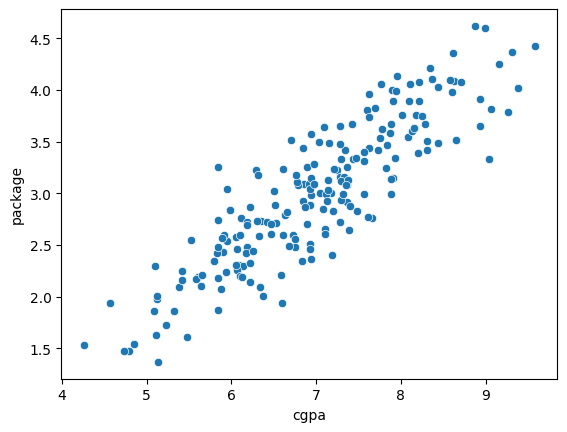

In [74]:
sns.scatterplot(x='cgpa', y='package', data=df)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
X = df.drop('package', axis=1)
y = df.package

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
lr.predict([[5.79]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.33443])

In [81]:
X = df.cgpa.values
y = df.package.values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [83]:
slr.fit(X_train, y_train)

In [84]:
slr.predict(5.79)

2.334430003888252

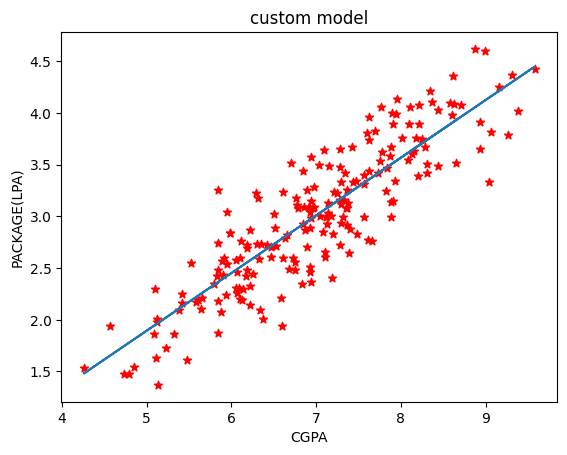

In [87]:
plt.xlabel('CGPA')
plt.ylabel('PACKAGE(LPA)')
plt.title('custom model')
plt.scatter(df.cgpa, df.package, color='red', marker='*')
plt.plot(X_train, slr.predict(X_train))

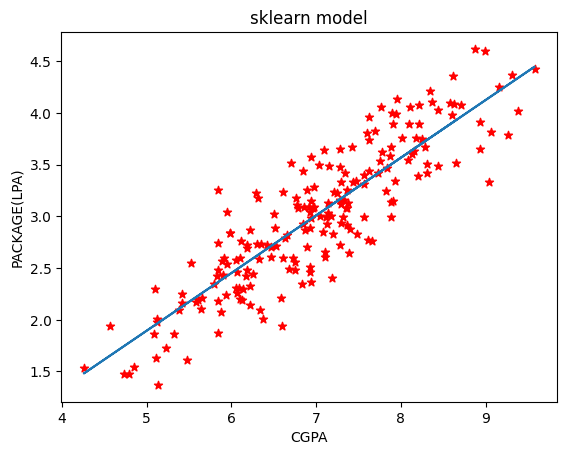

In [97]:
plt.xlabel('CGPA')
plt.ylabel('PACKAGE(LPA)')
plt.title('sklearn model')
plt.scatter(df.cgpa, df.package, color='red', marker='*')
plt.plot(X_train, lr.predict(X_train))